## Задача 2. Шолохов Алексей, 474гр.

In [3]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Будем решать трехдиогональную систему 

$\begin{cases}
u_0 = 0 \\
-u_{n-1}+(2+h^2)u_n - u_{n+1} = 2h^2sin(nh), n \in [1, N-1] \\
u_N = 0 \\
\end{cases}$

где $N = 20$, $h = \frac{\pi}{N}$.

Использовался классический метод прогонки, все обозначения совпадают с этой статьей:

http://e-lib.gasu.ru/eposobia/metody/R_1_3.html

In [6]:
N = 20
u0 = 3
from math import pi
h = pi/N

C = [0] + [-1]*(N-1)
D = [2+h**2]*(N)
E = [-1]*(N-1) + [0]
f = [2*h**2*sin(h*n) for n in range(N)] 

H1 = [0]
H2 = [f[0]/D[0]]
for i in range(N-1):
    H1.append(-E[i]/(D[i] + C[i+1]*H1[i]))
    H2.append((-C[i+1]*H2[i] + f[i])/(D[i] + C[i+1]*H1[i]))
    
X = [(-E[-1]*H1[-1] + f[-1])/(D[-1] + C[-1]*H1[-1])]

for i in reversed(range(N-1)):
    X.append(H1[i]*X[N-i-2] + H2[i])

Сравним полученное решение $X$ с теоретическим $X' = sin(nh)$. Видно, что они совпадают с неплохой точностью.

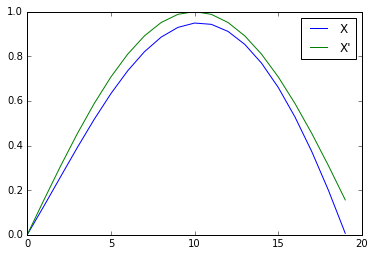

In [8]:
pylab.plot(list(range(N)), list(reversed(X)), label="X")
pylab.plot(list(range(N)), [np.sin(n*h) for n in range(N)], label="X'")
pylab.legend()